In [323]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random
import copy

In [324]:
class Problem:

    startState = (1,1)   # (x, y) class variable shared by all instances
    movesEffects = {"L":(-1,0), "R":(+1,0), "U":(0,+1), "D":(0,-1),}

    def __init__(self, dimension=(3,4), walls=[], penaltyState=[]):
        self.dimension = dimension
        self.walls = walls
        self.goalState = (dimension[1], dimension[0])    # instance variable unique to each instance
        self.penaltyState = penaltyState
        
        self.xMin, self.xMax = 1, dimension[1]
        self.yMin, self.yMax = 1, dimension[0]        
    
    def getLegalActions(self, state):
        validMoves = []
        for k,v in self.movesEffects.items():
            result_x = state[0] + v[0]
            result_y = state[1] + v[1]
            
            isValid = True

            if (result_x, result_y) in self.walls:
                isValid = False
            if result_x < self.xMin or result_x > self.xMax:
                isValid = False
            if result_y < self.yMin or result_y > self.yMax:
                isValid = False
            if isValid == True:
                validMoves.append(k)
        if not validMoves:
            print("no legal move for {} ".format(state))
        return validMoves
    
    def move(self, state, action):
        (new_x, new_y) = (-1,-1)
        if action in self.getLegalActions(state):
            new_x = state[0] + self.movesEffects[action][0]
            new_y = state[1] + self.movesEffects[action][1]
        if (new_x, new_y) == (-1,-1):
            print(state, action, self.getLegalActions(state))
            print("Error, invalid move!")
        return (new_x, new_y)
    
    def isGoal(self, state):
        return state == self.goalState
    
    def findPathCost(self, path):
        return len(path)
    
    def findStepCost(self, state, action):
        return 1
    

In [492]:
class SearchAgent:

    def __init__(self, p, method='bfs'):
        self.problem = p
        self.method = method
        self.frontierList = [(self.problem.startState, [], 0)] #(path end state, path list, path cost)
        self.exploredList = []
        self.visitedList = []
        self.path = []
    
    def moveChoice(self):
        if self.method == 'bfs':
            self.frontierList.sort(key=lambda x: x[2]) #sort the frontier list by path cost
            pathstep = self.frontierList.pop(0) #pop the smallest path cost item
        elif self.method == 'dfs':
            self.frontierList = sorted(self.frontierList, key=lambda x: x[2])[::-1] 
                #sort the frontier list by path cost
            pathstep = self.frontierList.pop(0)
        elif self.method == 'astar':
            min_total_cost = float(np.inf)
            min_pop_index = None
            for i in range(len(self.frontierList)):
                actual_cost = self.frontierList[i][2]
                # use manhattan distance as an estimation
                heuristic_cost = np.sqrt(np.sum(np.square(np.array(self.frontierList[i][0]) 
                                                          - np.array(self.problem.goalState))))
                total_cost = actual_cost + heuristic_cost
                if total_cost < min_total_cost:
                    min_total_cost = total_cost
                    min_pop_index = i
            pathstep = self.frontierList.pop(min_pop_index)

        return pathstep, self.frontierList 
    
    def findPaths(self, printGoal=False):

        while self.frontierList:

            pathstep, self.frontierList = self.moveChoice() 
            #different method only affect the choice of next node to explore

            s = pathstep[0] #state
            self.path = pathstep[1] #the active path

            if self.problem.isGoal(s):
                if printGoal:
                    print("{} no of steps: {}".format(method, len(path)))
                    print("Path:{}".format(path), end='\n')
                return self.path, self.visitedList  

            legalActionsList = self.problem.getLegalActions(s) # get legal moves

            self.exploredList.append(s)

            for a in legalActionsList:

                next_end = self.problem.move(s,a) #assume we take the move, what would be the future state?

                if next_end not in self.exploredList and next_end not in [x[0] for x in self.frontierList]:
                    #make sure we are not going back to explored node and no duplication in frontierList

                    if len(self.path) == 0: #make sure startState is included in the path
                        self.path.append(self.problem.startState)
                        self.visitedList.append(self.problem.startState) #for visual graph

                    next_path = copy.deepcopy(self.path)
                    next_path.append(next_end) #keep track on how did we reach this frontier node

                    self.frontierList.append((next_end, next_path, self.problem.findPathCost(next_path))) 

                    self.visitedList.append(next_end) # for visualization

        return self.path, self.visitedList
    
    def path2grid(self):
        assert(len(self.path) > 0)
        
        data = np.zeros(self.problem.dimension)
        
        for w in self.problem.walls:
            data[w[1]-1,w[0]-1] += 1.0

        for v in self.visitedList:
            data[v[1]-1,v[0]-1] += 0.2

        for pa in self.path:
            data[pa[1]-1,pa[0]-1] += 0.3
            
        data = np.flip(data,axis=0)
        
        return data

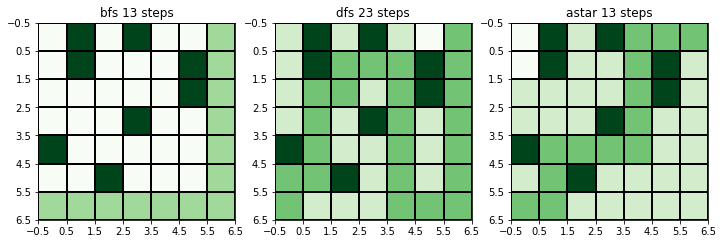

In [493]:
dimension = (7,7)
p = Problem(dimension,
            walls=[(1,3),
                   (2,6),(2,7),
                   (3,2),
                   (4,4),(4,7),
                   #(5,6),
                   (6,5),(6,6),
                  ]           
           )
searchMethodList = ['bfs','dfs','astar']

fig, axs = plt.subplots(1,len(searchMethodList), figsize=(12,4)) 

for i in range(len(searchMethodList)):
    s = SearchAgent(p, searchMethodList[i])
    path, visitedList = s.findPaths()
    data = s.path2grid()
    
    axs[i].imshow(data, cmap='Greens')

    # draw gridlines
    axs[i].set(title= str(searchMethodList[i]) + ' ' + str(len(path)) + ' steps')
    axs[i].grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    axs[i].set_xticks(np.arange(-.5, dimension[0], 1));
    axs[i].set_yticks(np.arange(-.5, dimension[1], 1));
    
plt.show()
    

In [ ]:
####################################################################

In [612]:
from matplotlib.font_manager import FontProperties

def displayRLMaze(p1, visitedPath):
    font0 = FontProperties()
    font1 = font0.copy()
    font1.set_size(20)
    font1.set_weight('bold')
    alignment = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
    dir2ArrowsMap = {'L':'◀','R':'►','U':'▲','D':'▼'}

    data = np.zeros(p1.dimension)

    fig, ax  = plt.subplots(1,1, figsize=(5,5)) 

    for w in p1.walls:
        data[w[1]-1,w[0]-1] = 0

    for v in visitedPath:
        data[v[1]-1,v[0]-1] += 0.01

    data = np.flip(data,axis=0)

    ax.imshow(data, cmap='Greens')

    for i in range(p1.dimension[1]):
        for j in range(p1.dimension[0]):        

            if (i+1,j+1) in p1.goalState:
                plt.text(i,p.dimension[1]-j-1,'◎', color='k', fontproperties=font1, **alignment)
            elif (i+1,j+1) in p1.penaltyState:
                plt.text(i,p.dimension[1]-j-1,'☠', color='k', fontproperties=font1, **alignment)
            elif (i+1,j+1) in r_walls:
                plt.text(i,p.dimension[1]-j-1,'X', color='k', fontproperties=font1, **alignment)
            else:
                qScoreMax = -np.Inf
                MaxDir = None
                for keys, values in p1.qScore[(i+1,j+1)].items():
                    if values > qScoreMax:
                        qScoreMax = values
                        MaxDir = keys
                plt.text(i,p.dimension[1]-j-1,dir2ArrowsMap[MaxDir], color='r', fontproperties=font1, **alignment) 
                
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, rl_dimension[0], 1));
    ax.set_yticks(np.arange(-.5, rl_dimension[1], 1));

In [631]:
class RL_Problem():
    legalMoves = ['L','R','U','D']
    moveEffect = {'L':(-1,0), 'R':(+1,0), 'U':(0,+1), 'D':(0,-1)}
    qScore = {} 
    step_reward = {}
    isTrained = False
    
    def __init__(self, dimension = (3,4), walls = [(2,2)], penaltyState = [],
                 goalStateReward=1.0, penaltyStateReward=-1.0, global_step_cost=-0.04):
        
        self.dimension = dimension
        self.walls = walls
        self.yMax, self.yMin = dimension[0], 1
        self.xMax, self.xMin = dimension[1], 1
        
        self.goalState = [(dimension[1], dimension[0])]
        self.penaltyState = penaltyState
        
        self.goalStateReward = goalStateReward
        self.penaltyStateReward = penaltyStateReward
        self.global_step_cost = global_step_cost
        
        self.initializeValues()
    
    def initializeValues(self):
        maze_width = self.dimension[1]
        maze_height = self.dimension[0]

        for i in range(maze_width):
            for j in range(maze_height):
                if (i+1,j+1) not in self.walls:
                    self.qScore[(i+1,j+1)] = {'L':0.0, 'R':0.0, 'U':0.0, 'D':0.0}

                if (i+1,j+1) in self.goalState:
                    self.step_reward[(i+1,j+1)] = self.goalStateReward
                elif (i+1,j+1) in self.penaltyState:
                    self.step_reward[(i+1,j+1)] = self.penaltyStateReward
                elif (i+1,j+1) in self.walls:
                    self.step_reward[(i+1,j+1)] = 0.0
                else:
                    self.step_reward[(i+1,j+1)] = self.global_step_cost
                    
    def getOptimalAction(self, s):
        maxQ = -np.Inf 
        optimalMove = None
        random.shuffle(self.legalMoves)
        for d in self.legalMoves:
            if self.qScore[s][d] > maxQ:
                maxQ = self.qScore[s][d]
                optimalMove = d
        return optimalMove, maxQ
    
    def move(self, currentState, a):
        threshold = [0.8,0.9]
        horizontalMoves = ['L','R']
        verticalMoves = ['U','D']
        r = random.random()

        if r <= threshold[0]:
            newState = (currentState[0] + self.moveEffect[a][0], currentState[1] + self.moveEffect[a][1])
        elif r > threshold[0] and r <= threshold[1]:
            if a in horizontalMoves:
                a1 = verticalMoves[0]
            else:
                a1 = horizontalMoves[0]
            newState = (currentState[0] + self.moveEffect[a1][0], currentState[1] + self.moveEffect[a1][1])
        else:
            if a in horizontalMoves:
                a1 = verticalMoves[1]
            else:
                a1 = horizontalMoves[1]
            newState = (currentState[0] + self.moveEffect[a1][0], currentState[1] + self.moveEffect[a1][1])           
        
        #print(newState)
        
        moveSucceeded = True
        if newState in self.walls:
            moveSucceeded = False
            #print("wall")
        if newState[0] < self.xMin or newState[0] > self.xMax:
            moveSucceeded = False
            #print("x error")
        if newState[1] < self.yMin or newState[1] > self.yMax:
            moveSucceeded = False
            #print("y error")
        #print(newState,currentState)

        if not moveSucceeded:
            newState = currentState
        return newState

In [ ]:
class RL_SearchAgent:
    
    endStateReached = False
    visitedPath = []

    def __init__(self, p1, alpha=0.1, gamma=0.7, initialState(1,1)):
    self.problem = p1
    self.alpha = alpha
    self.gamma = gamma
    self.initialState = (1,1)
    
    def trainModel(self, epoche=1000):
        
        self.visitedPath.append(self.initialState)
        
        currentState = self.initialState
        #while not endStateReached and iteration < 1000000:
        for i in range(epoche):
            optimalAct, optimalQscore = self.problem.getOptimalAction(currentState)

            nextState = self.problem.move(currentState, optimalAct)

            nextStateOptimalAct, nextStateOptimalQscore = self.problem.getOptimalAction(nextState)

            self.problem.qScore[currentState][optimalAct] += alpha * (self.problem.step_reward[nextState] + 
                                                                      gamma * (nextStateOptimalQscore-optimalQscore))

            currentState = nextState

            self.visitedPath.append(currentState)

            if currentState in self.problem.goalState: #in p1.penaltyState
                #print("end state reached!" + str(currentState))
                currentState = random.choice(list(self.problem.qScore.items()))[0]
                self.problem.isTrained = True
                list(self.problem.qScore.items())
                endStateReached = True


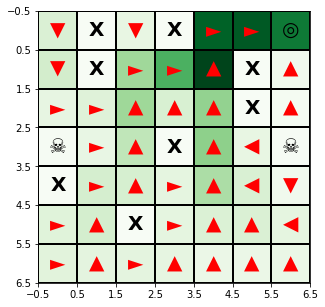

In [660]:
####### next time work on here #######!
p1 = RL_Problem(dimension = (7,7), 
                walls=[(1,3),
                       (2,6),(2,7),
                       (3,2),
                       (4,4),(4,7),
                       #(5,6),
                       (6,5),(6,6)],
                penaltyState = [(1,4),(7,4)], goalStateReward=1.5, 
                penaltyStateReward=-1.5,global_step_cost=-0.04)

alpha = 0.1
gamma = 0.7
initialState = (1,1)
endStateReached = False
visitedPath = []

visitedPath.append(initialState)
currentState = initialState
#while not endStateReached and iteration < 1000000:
for i in range(20000):
    optimalAct, optimalQscore = p1.getOptimalAction(currentState)
    
    nextState = p1.move(currentState, optimalAct)
    #print(nextState)
    
    nextStateOptimalAct, nextStateOptimalQscore = p1.getOptimalAction(nextState)
    
    p1.qScore[currentState][optimalAct] += alpha * (p1.step_reward[nextState] + 
                                                    gamma * (nextStateOptimalQscore-optimalQscore))
        
    currentState = nextState
    
    visitedPath.append(currentState)

    if currentState in p1.goalState: #in p1.penaltyState
        #print("end state reached!" + str(currentState))
        currentState = random.choice(list(p1.qScore.items()))[0]
        p1.isTrained = True
        list(p1.qScore.items())
        endStateReached = True
        
displayRLMaze(p1,visitedPath)

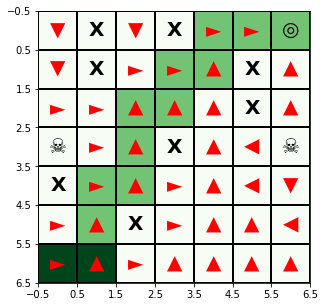

In [666]:
initialState = (1,1)
endStateReached = False
searchPath = []

currentState = initialState
searchPath.append(currentState)
while not endStateReached:
    optimalAct, optimalQscore = p1.getOptimalAction(currentState)
    nextState = p1.move(currentState, optimalAct)
    
    currentState = nextState
    searchPath.append(currentState)
    
    if currentState in p1.goalState: #in p1.penaltyState
        endStateReached = True
        
displayRLMaze(p1,searchPath)